In [84]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick

# Opening CSV file
try:
    dataframe = pd.read_csv("iris.csv")
except IOError:
    pass

# Loading dataset from sklearn package
iris = datasets.load_iris()
# Creating data frame for pandas
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# Download from the internet
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# Requires setting column names manually
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
dataframe =  pd.read_csv(csv_url, names = col_names)

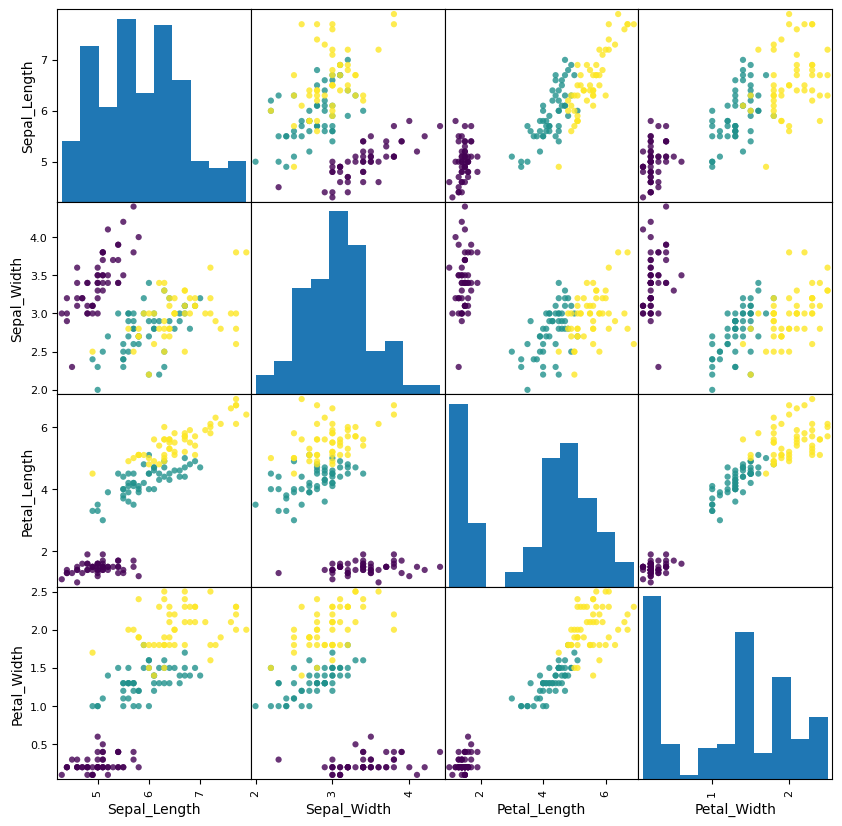

In [85]:
p = scatter_matrix(dataframe, c=iris['target'],marker='o', s=20, alpha=.8, figsize=(10,10))
plt.show()

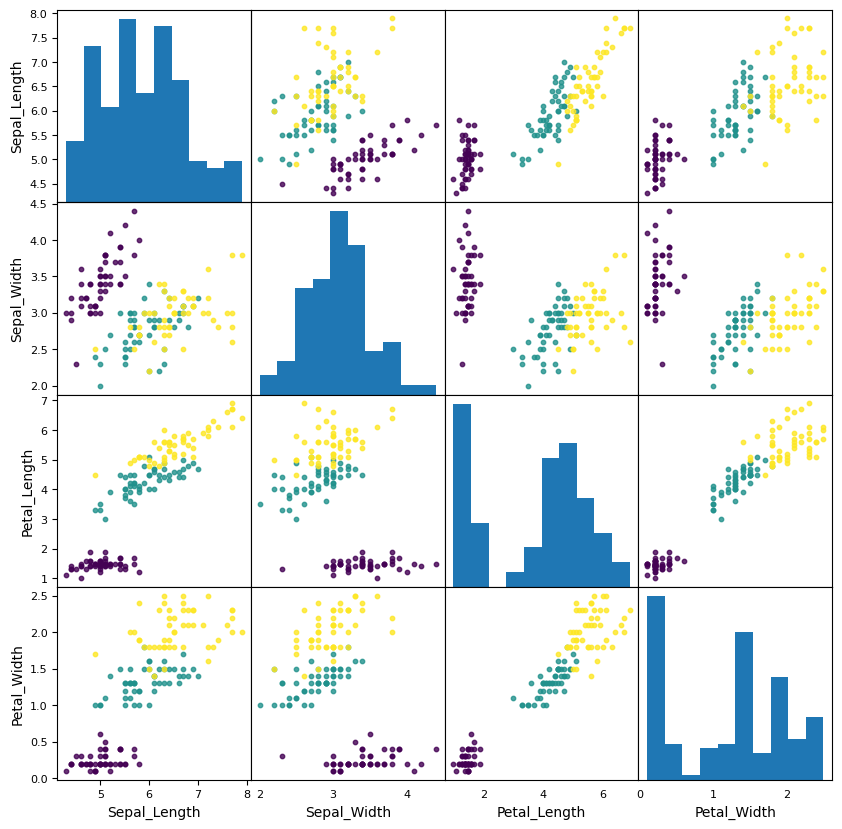

In [86]:
# Parametres of Irises dictionary:
param_dic = {"Sepal_Length" : "Sepal_Length", "Sepal_Width" : "Sepal_Width", 
              "Petal_Length" : "Petal_Lenght", "Petal_Width" : "Petal_Width"}

#Classes of Irises dictionary:
class_dic = {"Iris-setosa" : "Iris-setosa", "Iris-versicolor" : "Iris-versicolor",
             "Iris-virginica" : "Iris-virginica"}

#Colors massive:
colors = [(0.267004, 0.004874, 0.329415, 0.8), (0.127568, 0.566949, 0.550556, 0.8), 
          (0.993248, 0.906157, 0.143936, 0.8)]

#Creating plots:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (10, 10))

#Adjust space between plots
plt.subplots_adjust(wspace = 0, hspace = 0)

#Redacting and creating every single plot:
for param1, x in zip(param_dic, range(len(param_dic))):
    for param2, y in zip(param_dic, range(len(param_dic))):
        if (x == y):
            #Adding labels for border plots:
            ax[len(param_dic)-1][x].set_xlabel(param1)
            ax[y][0].set_ylabel(param1)
            
            if(x != 0):
                ax[x][y].tick_params(
                                     axis = 'both',
                                     left = False, 
                                     right = False, 
                                     labelleft = False, 
                                     labelright = False, 
                                     labeltop = False, 
                                     bottom = False, 
                                     top = False, 
                                     labelsize = 8
                                    )
            
            ax[x][y].hist(dataframe[param2], bins = 10)
            
            #Creating histogram in own scale on [0, 0] because some problems with cycles:
            if(x == 0):
                ax[x][y].hist(dataframe[param2], bins = 10, color = '#1f77b4')
                ax_temp = ax[x][y].twinx()
                ax_temp.scatter(dataframe[param2], dataframe[param1], s = 0)
                ax_temp.set_ylabel(param1)
                ax_temp.yaxis.set_label_position('left')
                ax_temp.yaxis.tick_left()
                ax_temp.tick_params(labelsize = 8)
                ax[x][y].axis('off')
            
        else:
            if y != 0:
                    ax[x][y].tick_params(
                                         axis = 'both',
                                         left = False, 
                                         right = False, 
                                         labelleft = False, 
                                         labelright = False, 
                                         labeltop = False, 
                                         bottom = False, 
                                         top = False, 
                                         labelsize = 8
                                        )
            else:
                ax[x][y].tick_params(labelsize = 8)
                
            #Creating plots for each class separately:
            
            for iris_class, color in zip(class_dic, colors):
                ax[x][y].scatter(dataframe.loc[dataframe["Class"] == iris_class][param2],
                                 dataframe.loc[dataframe["Class"] == iris_class][param1],
                                 s = 10, color = color)

#Problem with 1st histogramm y-label, its not from scatters, because they are filled after histogramm, tried to fix
#but I have some problems...


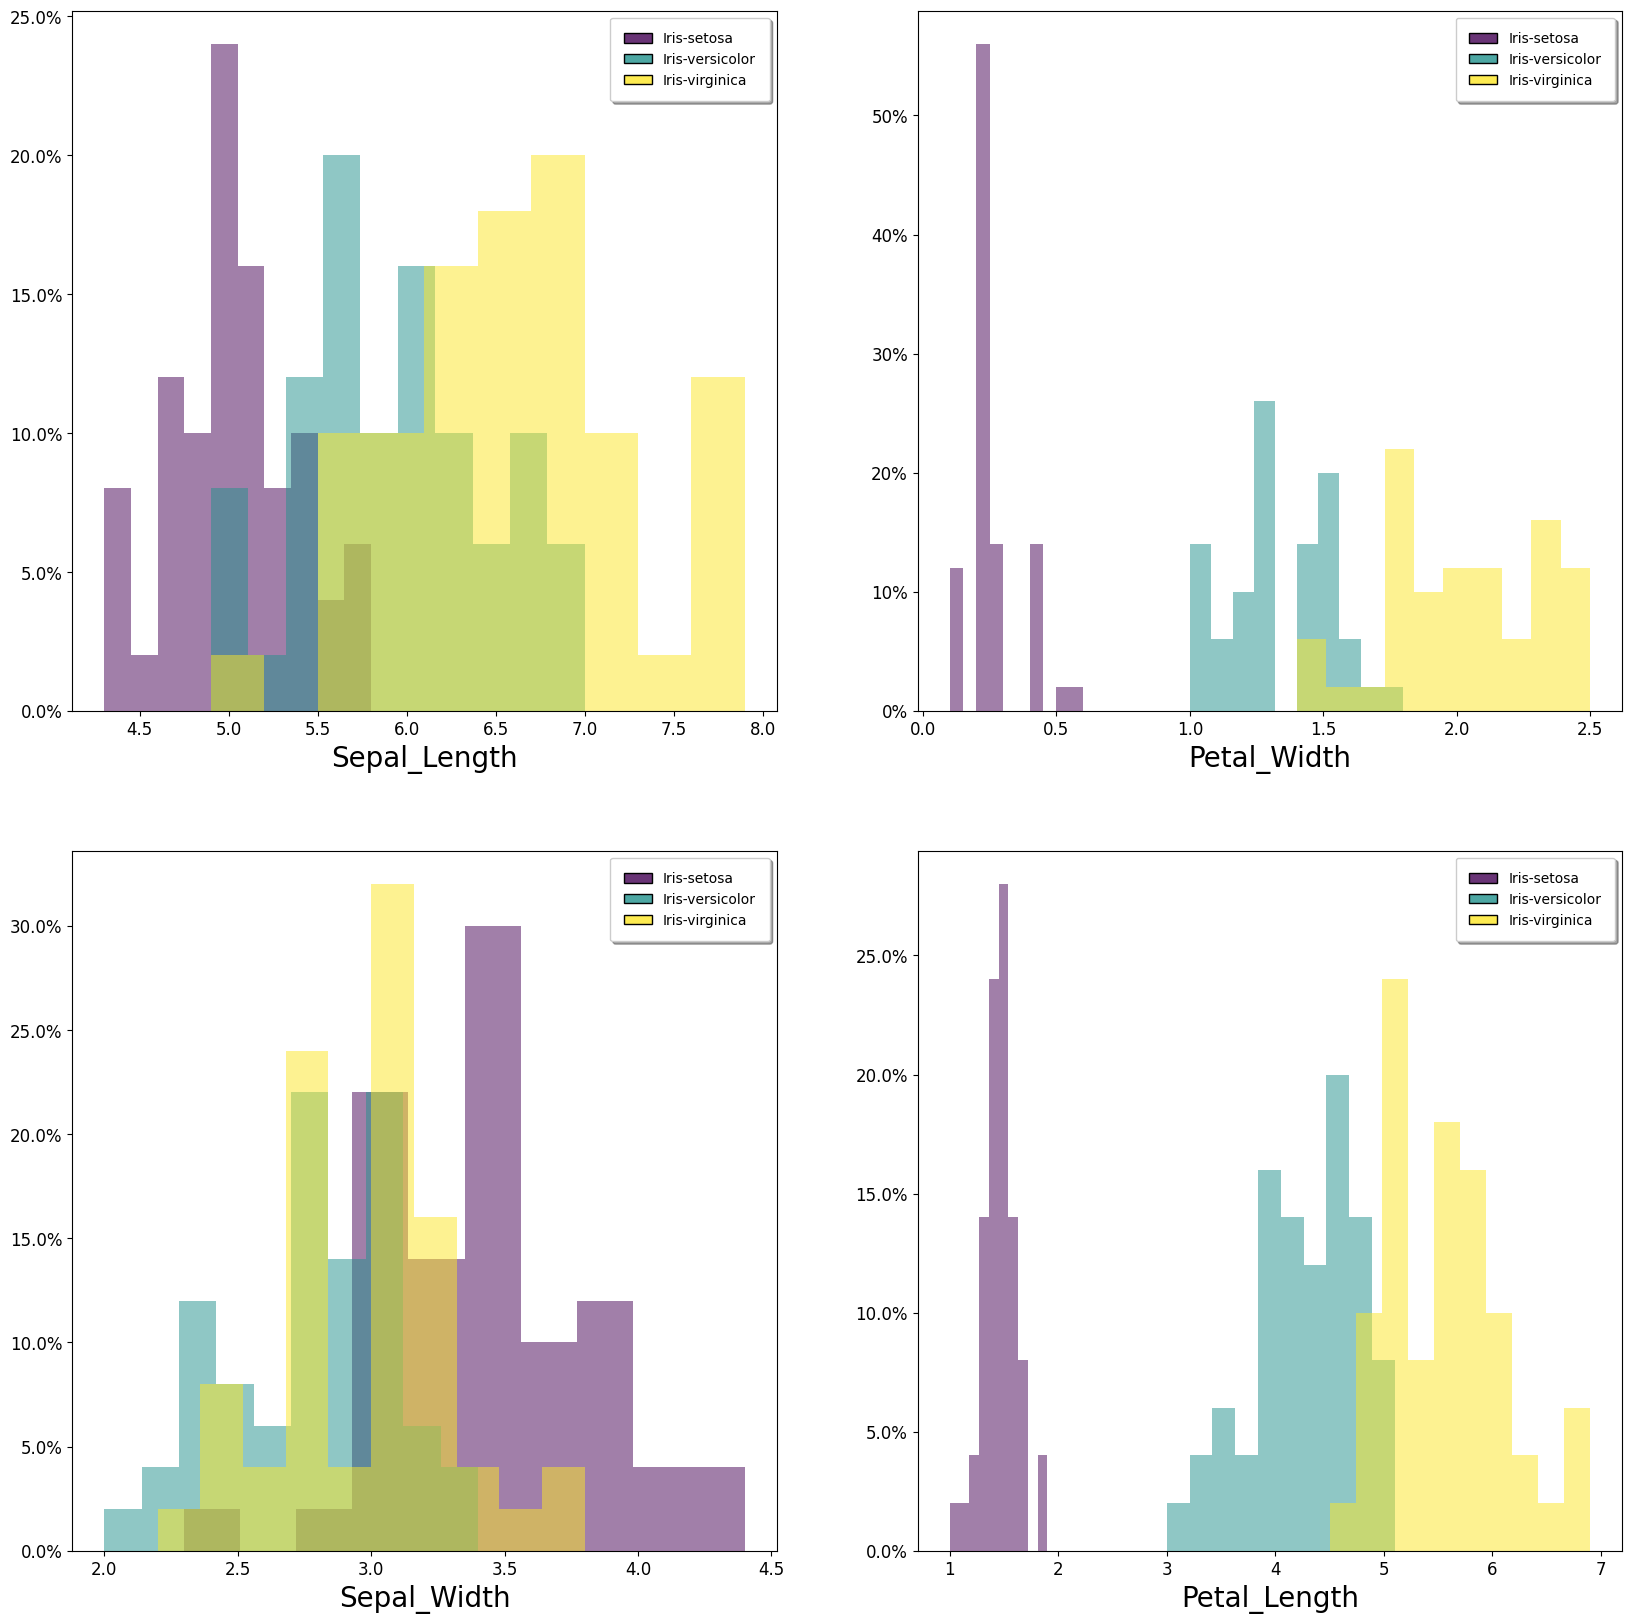

In [87]:
#Creating histograms like subplots:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))

#cycle for different parametres of irises:
for param, x in zip(param_dic, range(len(param_dic))):
    
    #Stupid 'if' for jumping between rows (maybe fixed later but now...)
    if(x < 2):
        for iris_class, color in zip(class_dic, colors):
            data = dataframe.loc[dataframe["Class"] == iris_class][param]
            ax[x][0].hist(data, weights=np.ones(len(data))/len(data), #Filling weighted histogram
                          color = color, alpha = 0.5, bins = 10)
            
        ax[x][0].yaxis.set_major_formatter(mtick.PercentFormatter(1)) #% format
        
        #Adding legend and formating view
        handles = [Rectangle((0, 0), 2, 2, color = c, ec = "k") for c in colors]
        ax[x][0].legend(handles, class_dic, fancybox=True, framealpha=1, shadow=True, borderpad=1)
        ax[x][0].set_xlabel(param, fontsize = 20)
        ax[x][0].tick_params(labelsize = 12)
    else:
        #because of 'if'...
        x = len(param_dic) - 1 - x
        
        #Similar actions:
        for iris_class, color in zip(class_dic, colors):
            data = dataframe.loc[dataframe["Class"] == iris_class][param]
            ax[x][1].hist(data, weights=np.ones(len(data))/len(data), color = color, alpha = 0.5, bins = 10)
        
        ax[x][1].yaxis.set_major_formatter(mtick.PercentFormatter(1))
        
        handles = [Rectangle((0, 0), 2, 2, color = c, ec = "k") for c in colors]
        ax[x][1].legend(handles, class_dic, fancybox = True, framealpha = 1, shadow = True, borderpad = 1)
        ax[x][1].set_xlabel(param, fontsize = 20)
        ax[x][1].tick_params(labelsize = 12)   
        
#Too much copy-paste, may be fixed

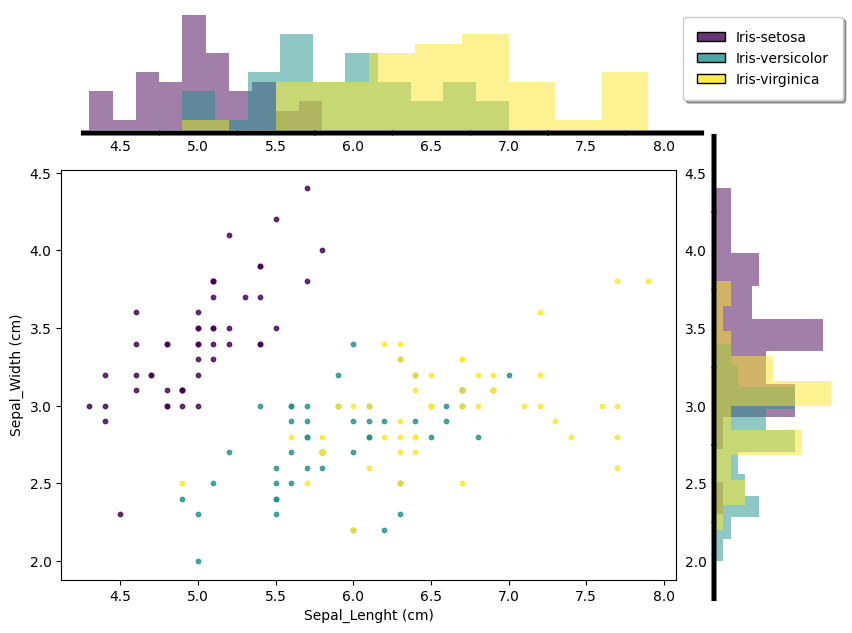

In [88]:
#Join plot:

fig, ax = plt.subplots(figsize = (10, 10))

# the scatter plot:
for iris_class, color in zip(class_dic, colors):
    ax.scatter(dataframe.loc[dataframe["Class"] == iris_class]["Sepal_Length"],
               dataframe.loc[dataframe["Class"] == iris_class]["Sepal_Width"],
               s = 10, color = color)

ax.set_xlabel("Sepal_Lenght (cm)")
ax.set_ylabel("Sepal_Width (cm)")

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)

# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad = 0.4)
ax_histy = divider.append_axes("right", 1.2, pad = 0.4)

# make some labels invisible
ax_histx.xaxis.set_tick_params(width = 57, labelright = False)
ax_histx.get_yaxis().set_visible(False)
ax_histx.set_frame_on(False)

ax_histy.yaxis.set_tick_params(width = 57, labeltop = False)
ax_histy.get_xaxis().set_visible(False)
ax_histy.set_frame_on(False)

#Create histograms
for iris_class, color in zip(class_dic, colors):
        ax_histx.hist(dataframe.loc[dataframe["Class"] == iris_class]["Sepal_Length"], 
                      color = color, alpha = 0.5, bins = 10)
        
        ax_histy.hist(dataframe.loc[dataframe["Class"] == iris_class]["Sepal_Width"],
                      color = color, alpha = 0.5, bins = 10, orientation='horizontal')
#legend:       
handles = [Rectangle((0, 0), 2, 2, color = c, ec = "k") for c in colors]
ax_histx.legend(handles, class_dic, bbox_to_anchor=(1, 1), fancybox = True, framealpha = 1,
                shadow = True, borderpad = 1)